<h1 align='center'>Heart Attack Analysis and Prediction</h1>

### Project Content
1. [Introduction](#1)
    * 1.1 [Examining the Project Topic](#2)
    * 1.2 [Recognizing the variable](#3)
2. [First Organization](#4)
    * 2.1 [Required Libraries](#5)
        * 2.1.1 [Basic Libraries](#6)

### 1. Introduction <a id = 1/></a>

#### 1.1 Examining the Project Topic <a id = 2></a>

- The medical name of a heart attack is “Myocardial infarction”.
- Heart attack in short; It is the occlusion of the vessel by plaque-like lesions filled with cholesterol and fat.
- The lesion is an abnormal conditions that occur in the organs where the disease is located.
- As a result of the blockage, the blood flow is completely cut off, and a heart attack that can lead to death occurs.

#### 1.2 Recognizing the variable<a id = 3></a>

**Variable defintions in the Dataset**
- age - age in years
- sex 
    - Value 1 = male; 
    - Value 0 = female
- cp - chest pain type 
    - Value 1 = typical angina; 
    - Value 2 = atypical angina; 
    - Value 3 = non-anginal pain; 
    - Value 0 = asymptomatic
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl 
    - Value 1 = true
    - Value 0 = false
- restecg - resting electrocardiographic results 
    - Value 1 = normal; 
    - Value 2 = having ST-T wave abnormality; 
    - Value 0 = hypertrophy
- thalach - maximum heart rate achieved
- exang - exercise induced angina 
    - Value 1 = yes 
    - Value 0 = no
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment 
    - Value 2 = upsloping; 
    - Value 1 = flat; 
    - Value 0 = downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 
    - Value 2 = normal; 
    - Value 1 = fixed defect; 
    - Value 3 = reversable defect
- num - the predicted attribute - diagnosis of heart disease (angiographic disease status) 
    - Value 0 = < diameter narrowing 
    - Value 1 = > 50% diameter narrowing

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
dataset = pd.read_csv('heart.csv')
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Initial analysis

In [3]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.rename(columns={'thalachh':'thalach', 'exng':'exang', 'output':'target', 'restecg':'rest_ecg', 
                       'caa':'ca'}, inplace=True)
dataset.head(3)

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slp,ca,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slp,ca,thall,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slp         0
ca          0
thall       0
target      0
dtype: int64

## Preparation for exploratory data analysis (EDA)

### Examining missing values

In [18]:
dataset.isna().sum().to_frame(name='MissingValues')

pandas.core.series.Series

<Axes: >

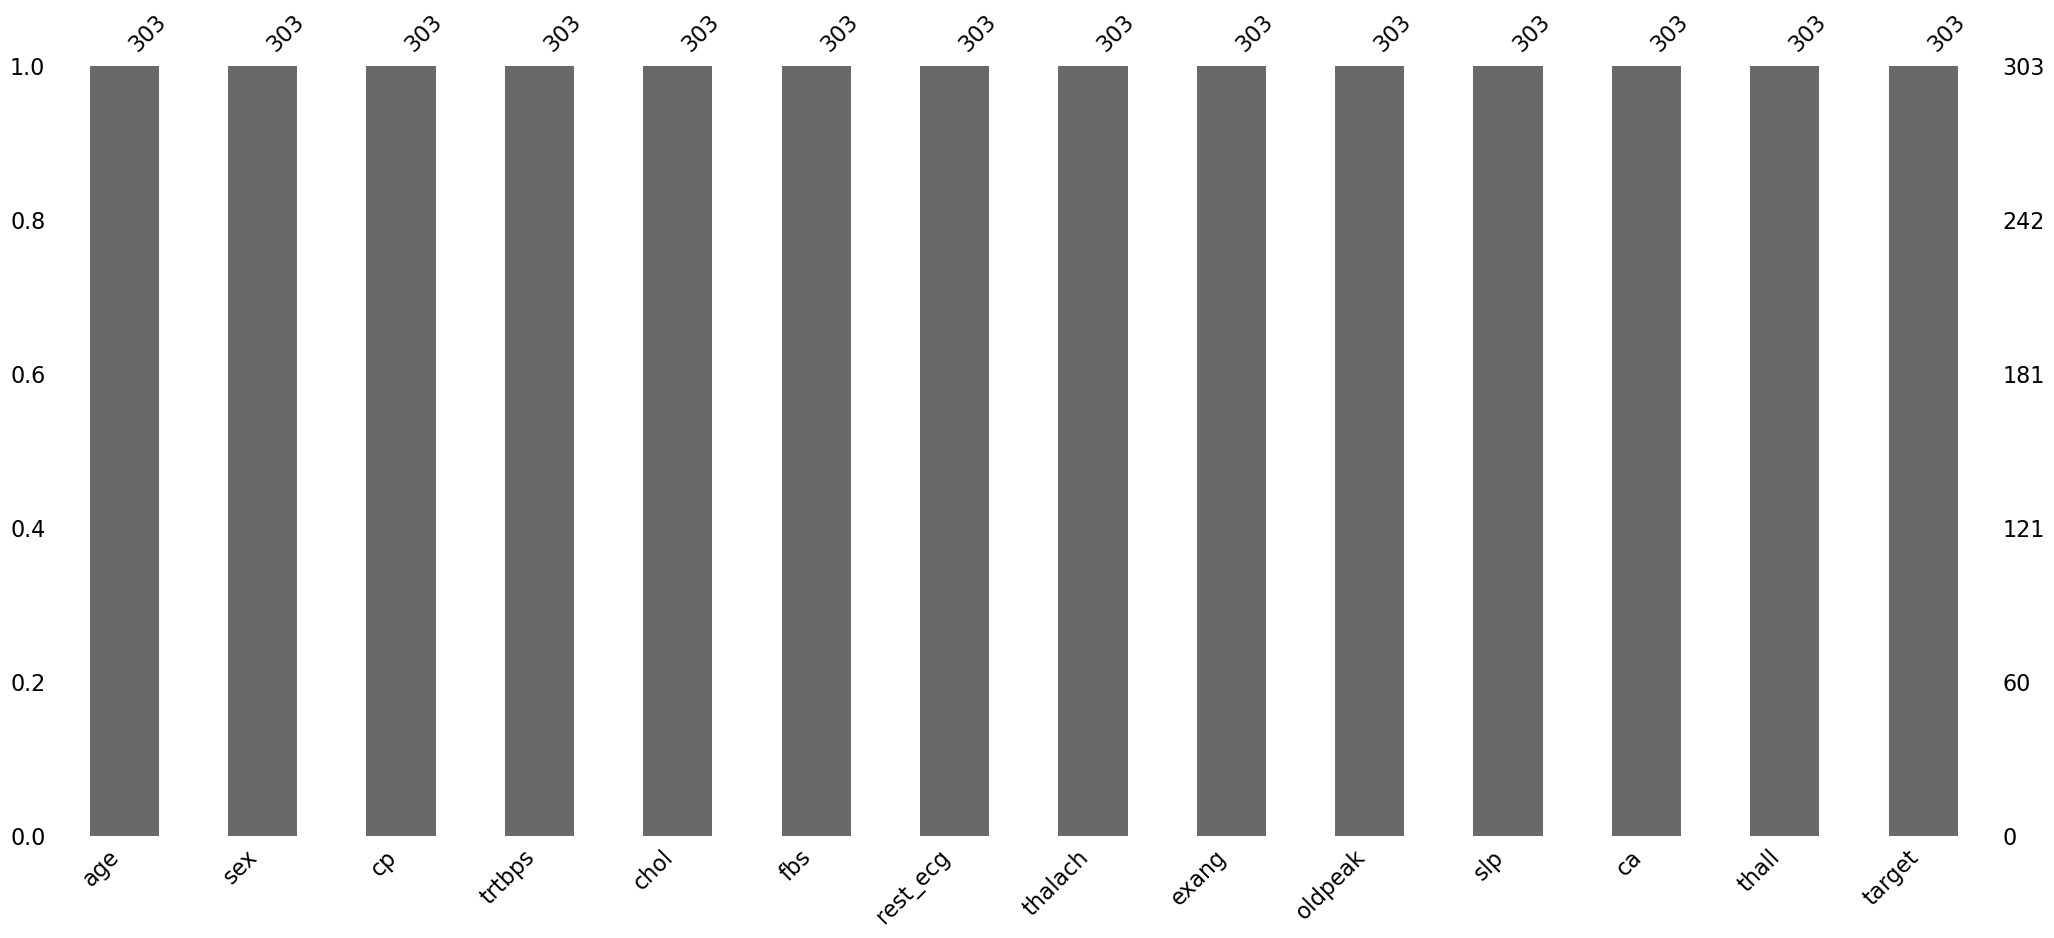

In [9]:
import missingno
missingno.bar(dataset)

### Examining unique values

In [10]:
dataset['age'].value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

In [23]:
dataset.value_counts().to_frame('Total Unique Values').sort_values(by='Total Unique Values', ascending=False)

Total Unique Values
age sex cp trtbps chol fbs rest_ecg thalach exang oldpeak slp ca thall target                     
38  1   2  138    175  0   1        173     0     0.0     2   4  2     1                         2
41  0   1  105    198  0   1        168     0     0.0     2   1  2     1                         1
35  0   0  138    183  0   1        182     0     1.4     2   0  2     1                         1
    1   0  120    198  0   1        130     1     1.6     1   0  3     0                         1
           126    282  0   0        156     1     0.0     2   0  3     0                         1
...                                                                                            ...
71  0   2  110    265  1   0        130     0     0.0     2   1  2     1                         1
74  0   1  120    269  0   0        121     1     0.2     2   1  2     1                         1
76  0   2  140    197  0   2        116     0     1.1     1   0  2     1                         1
68  0   2  120    211  0   0        115     0     1.5     1   0  2     1                         1
77  1   0  125    304  0   0        162     1     0.0     2   3  2     0                         1

[302 rows x 1 columns]

In [27]:
unique_number = []
for i in dataset.columns:
    x = dataset[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index=dataset.columns, columns=['Total Unique Values'])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


In [29]:
print(unique_number)

[np.int64(41), np.int64(2), np.int64(4), np.int64(49), np.int64(152), np.int64(2), np.int64(3), np.int64(91), np.int64(2), np.int64(40), np.int64(3), np.int64(5), np.int64(4), np.int64(2)]


### Separating Variables (Numeric/Categorical)

In [30]:
numeric_var = ['age', 'trtbps', 'chol', 'thalach', 'oldpeak']
categorical_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

### Statistical Analysis on dataset (only numeric)

In [32]:
dataset[['age', 'trtbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### Statistical Analysis (Age)

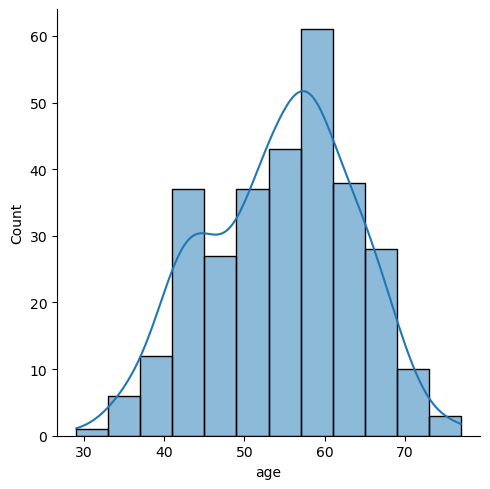

In [47]:
sns.displot(dataset['age'], kind='hist', kde=True, linewidth=1, edgecolor='k')

<Axes: ylabel='age'>

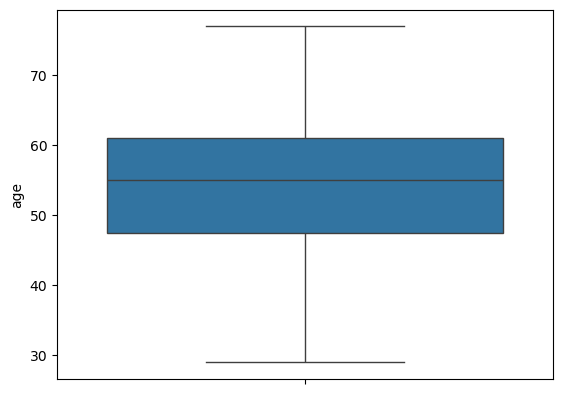

In [50]:
sns.boxplot(dataset['age'])

### Statistical analysis (trtbps)

In [53]:
dataset['trtbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64

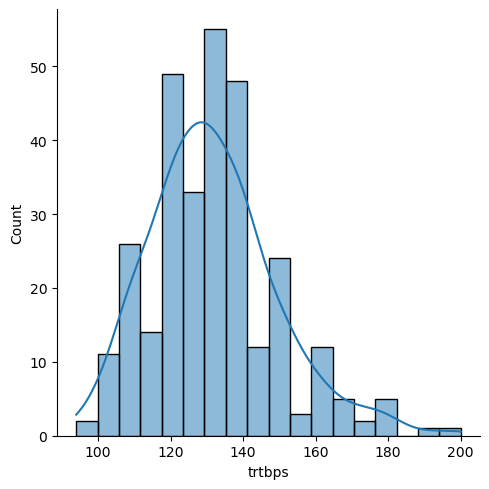

In [48]:
sns.displot(dataset['trtbps'], kind='hist', kde=True, linewidth=1, edgecolor='k')

<Axes: ylabel='trtbps'>

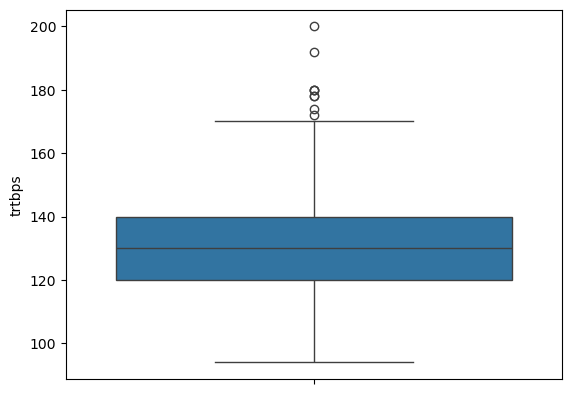

In [52]:
sns.boxplot(dataset['trtbps'])

### Statistical Analysis (chol)

In [54]:
dataset['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

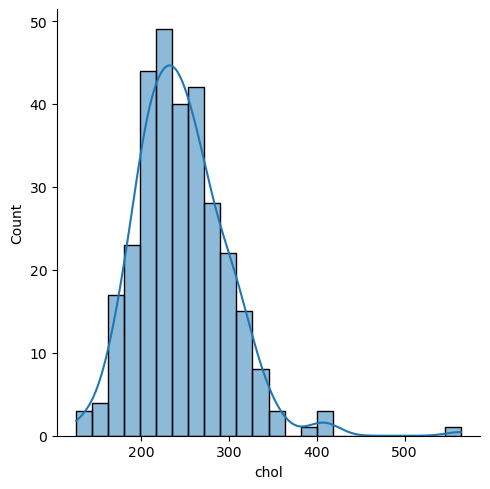

In [49]:
sns.displot(dataset['chol'], kind='hist', kde=True, linewidth=1, edgecolor='k')

<Axes: ylabel='chol'>

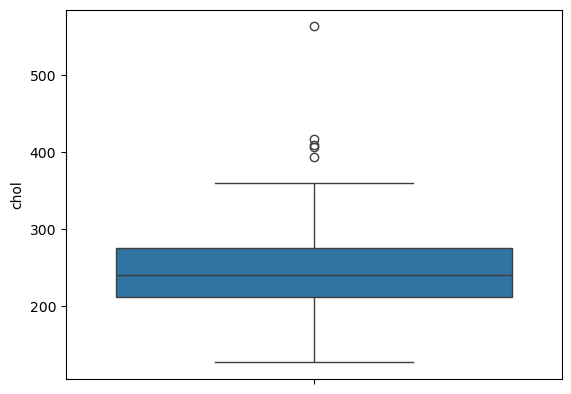

In [55]:
sns.boxplot(dataset['chol'])

### Statistical analysis (thalach)

In [57]:
dataset['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

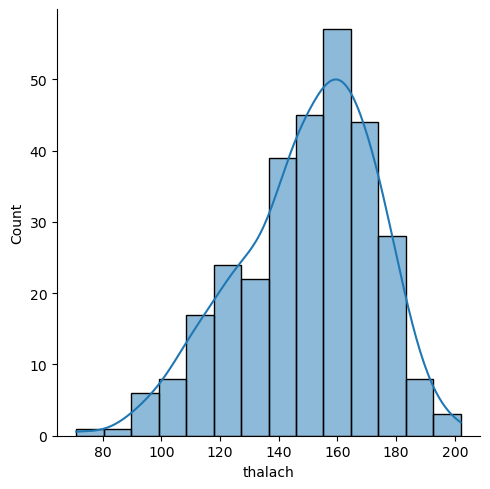

In [56]:
sns.displot(dataset['thalach'], kind='hist', kde='true')

<Axes: ylabel='thalach'>

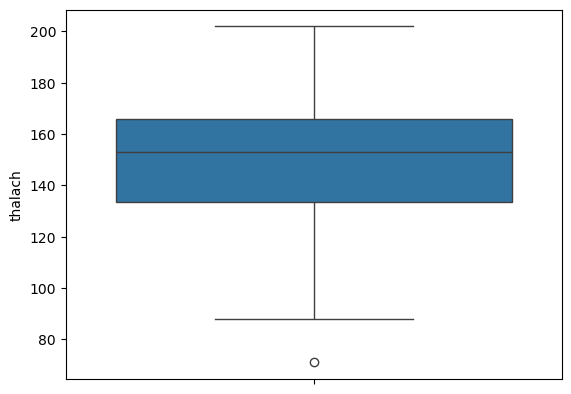

In [58]:
sns.boxplot(dataset['thalach'])

### Statistical analysis (oldpeak)

In [59]:
dataset['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

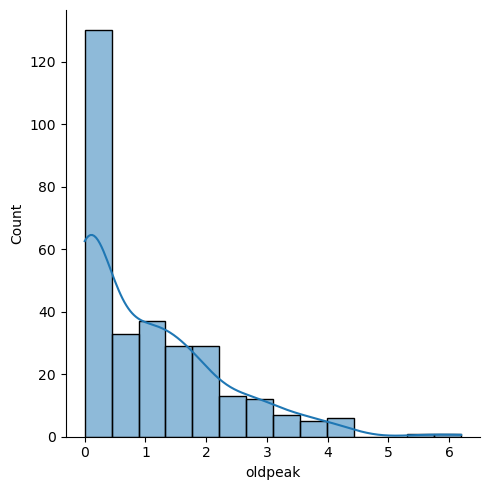

In [60]:
sns.displot(dataset['oldpeak'], kind='hist', kde=True)

<Axes: ylabel='oldpeak'>

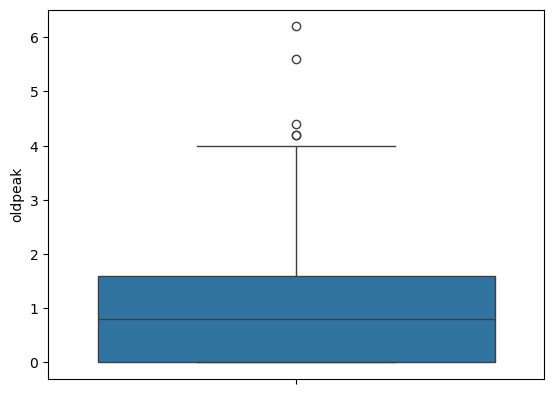

In [61]:
sns.boxplot(dataset['oldpeak'])